=== Stock Market Trend Prediction using ANN ===

✅ Dataset loaded successfully!
Shape: (619040, 7)
Columns: ['date', 'open', 'high', 'low', 'close', 'volume', 'Name']

📊 Sample Data:
              date    open      high      low   close   volume Name
0       2013-02-08   15.07   15.1200   14.630   14.75  8407500  AAL
508224  2013-02-08   81.22   81.9300   80.940   81.89   296853  SLG
506965  2013-02-08   78.24   79.0700   78.125   79.07  4632684  SLB
85755   2013-02-08  236.64  238.6924  235.750  238.16   552207  BLK
505706  2013-02-08   89.04   89.4800   88.910   89.16   554948  SJM


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Enter number of epochs for training (e.g. 50): 5

🚀 Training the ANN model...
Epoch 1/5
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7412 - loss: 0.5189
Epoch 2/5
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7459 - loss: 0.5067
Epoch 3/5
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7463 - loss: 0.5061
Epoch 4/5
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.7454 - loss: 0.5062
Epoch 5/5
15476/15476 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7458 - loss: 0.5066

🔍 Evaluating model performance...
3869/3869 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

✅ Model Accuracy: 0.73


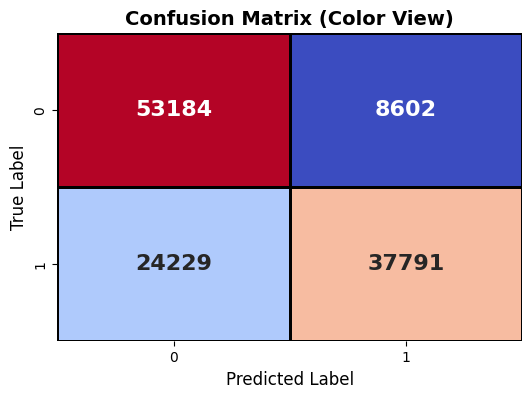

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

📅 Predicted next-day trend for AAL: DOWN 📉

✨ Stock Market Trend Prediction Complete!


In [10]:
# -----------------------------------------------------------
# Stock Market Trend Prediction using ANN
# -----------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# Step 1: Load Dataset
# -----------------------------------------------------------
print("=== Stock Market Trend Prediction using ANN ===")

# Read the dataset (update file name if needed)
df = pd.read_csv('/content/SCOA_A5 .csv')

print("\n✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# -----------------------------------------------------------
# Step 2: Preprocessing
# -----------------------------------------------------------
# Select necessary columns
df = df[['date', 'open', 'high', 'low', 'close', 'volume', 'Name']]

# Sort by date to maintain time order
df = df.sort_values(by='date')

print("\n📊 Sample Data:")
print(df.head())

# Create target variable: 1 if next day’s Close > today’s Close, else 0
df['Target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

# Drop last row with NaN target
df = df.dropna()

# Select features
features = df[['open', 'high', 'low', 'close', 'volume']]

# Scale features for ANN
scaler = MinMaxScaler()
X = scaler.fit_transform(features)
y = df['Target'].values

# -----------------------------------------------------------
# Step 3: Split Dataset
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -----------------------------------------------------------
# Step 4: Build ANN Model
# -----------------------------------------------------------
model = Sequential([
    Dense(64, input_dim=5, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# -----------------------------------------------------------
# Step 5: Train the Model
# -----------------------------------------------------------
EPOCHS = int(input("Enter number of epochs for training (e.g. 50): "))
print("\n🚀 Training the ANN model...")
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, verbose=1)

# -----------------------------------------------------------
# Step 6: Evaluate Model
# -----------------------------------------------------------
print("\n🔍 Evaluating model performance...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n✅ Model Accuracy: {accuracy:.2f}")

# --- Colored Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            annot_kws={"size": 16, "weight": "bold"}, linewidths=1, linecolor='black')
plt.title("Confusion Matrix (Color View)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# -----------------------------------------------------------
# Step 7: Predict Trend for Latest Entry
# -----------------------------------------------------------
latest_data = X_test[-1].reshape(1, -1)
pred = model.predict(latest_data)
trend = "UP 📈" if pred > 0.5 else "DOWN 📉"

print(f"\n📅 Predicted next-day trend for {df['Name'].iloc[0]}: {trend}")
print("\n✨ Stock Market Trend Prediction Complete!")
